In [145]:
import yfinance as yf
import numpy as np
import pandas as pd

In [146]:
sp = yf.download('^GSPC', start='2015-01-01', end='2025-01-01')

[*********************100%***********************]  1 of 1 completed


In [147]:
sp.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2015-01-02,2058.199951,2072.360107,2046.040039,2058.899902,2708700000
2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3799120000
2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4460110000
2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3805480000
2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3934010000


In [148]:
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [149]:
sp[sp.isnull().any(axis=1)]

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,


In [150]:
sp.columns = sp.columns.droplevel('Ticker')
sp.columns.name = None
sp_close = sp[["Close"]].rename(columns={"Close":"Prices"})

<Axes: xlabel='Date'>

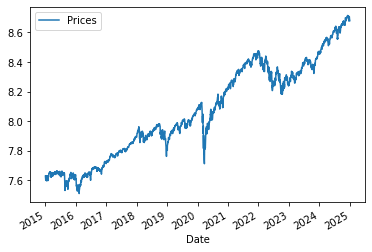

In [ ]:
sp_close_log = np.log(sp_close)
sp_close_log_diff = sp_close_log.diff().dropna()

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot, moment
def plot_data(x, x_log, x_log_diff):
    with sns.axes_style("dark"):
        fig, axes = plt.subplots(3, 1, figsize=(14, 8))
        x.plot(ax=axes[0], title="S&P 500")
        x_log.plot(ax=axes[1], sharex=axes[0])
        axes[1].set_ylabel('Log')
        x_log_diff.plot(ax=axes[2], sharex=axes[0])
        axes[2].set_ylabel('Log Diff')
        sns.despine()
        fig.tight_layout()
        fig.align_ylabels(axes)

In [171]:
def plot_correlogram(x, lags=None, title=None):
    lags = min(10, int(len(x)/10)) if lags is None else lags
    with sns.axes_style("whitegrid"):
        fig, axes = plt.subplots(2, 2, figsize=(14, 8))
        x.plot(ax=axes[0,0], title="Residuals")
        x.rolling(21).mean().plot(ax=axes[0][0], c='k', lw=1)
        probplot(x["Prices"], plot=axes[0][1])
        mean, var, skew, kurt = moment(x["Prices"], moment=[1, 2, 3, 4])
        s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurt:9.2f}'
        axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
        plot_acf(x, lags=lags, ax=axes[1,0])
        plot_pacf(x, lags=lags, ax=axes[1,1])
        axes[1][0].set_xlabel('Lag')
        axes[1][1].set_xlabel('Lag')
        fig.suptitle(title, fontsize=14)
        sns.despine()
        fig.tight_layout()
        fig.subplots_adjust(top=.9)

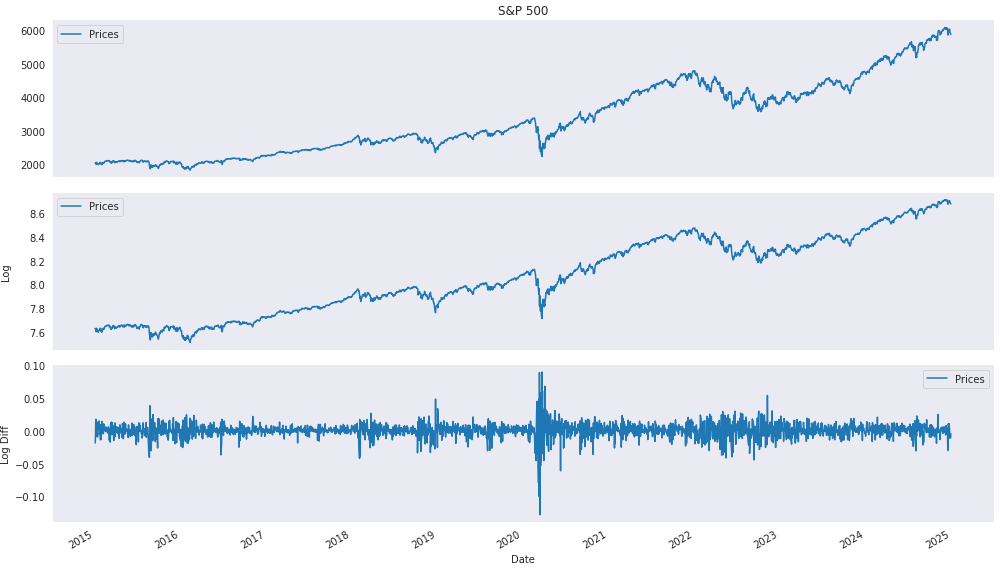

In [ ]:
plot_data(sp_close, sp_close_log, sp_close_log_diff)

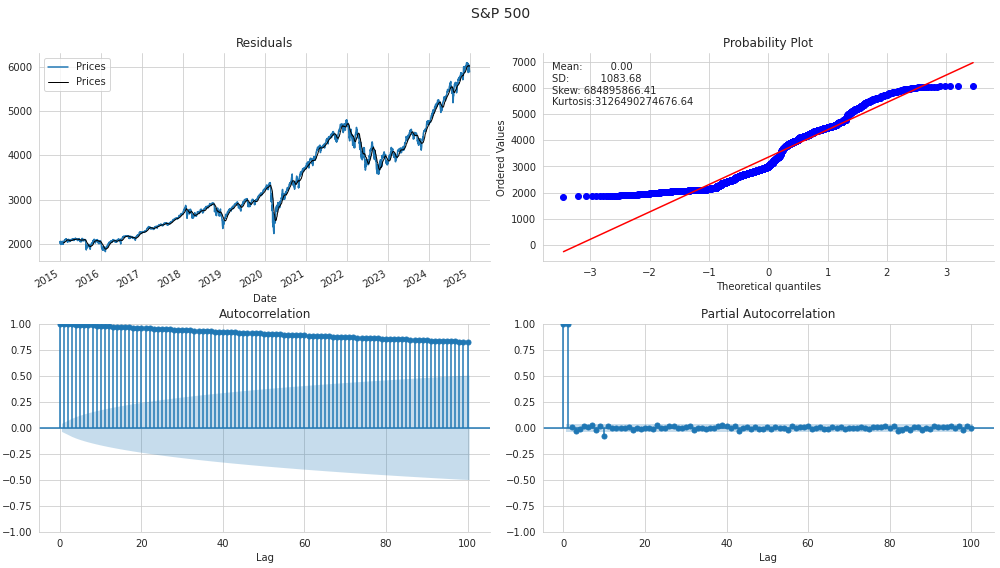

In [173]:
plot_correlogram(sp_close, lags=100, title="S&P 500")

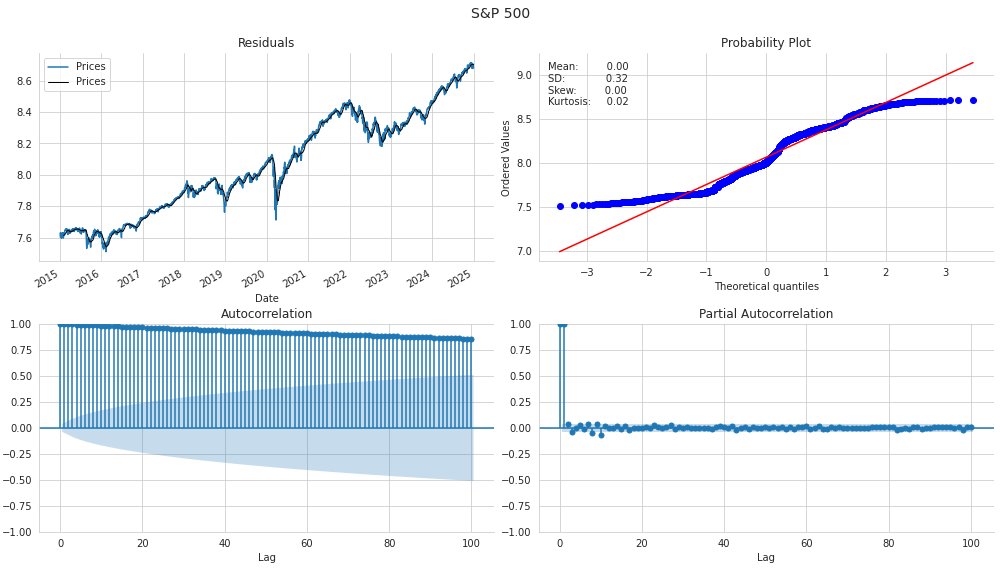

In [174]:
plot_correlogram(sp_close_log, lags=100, title="S&P 500")

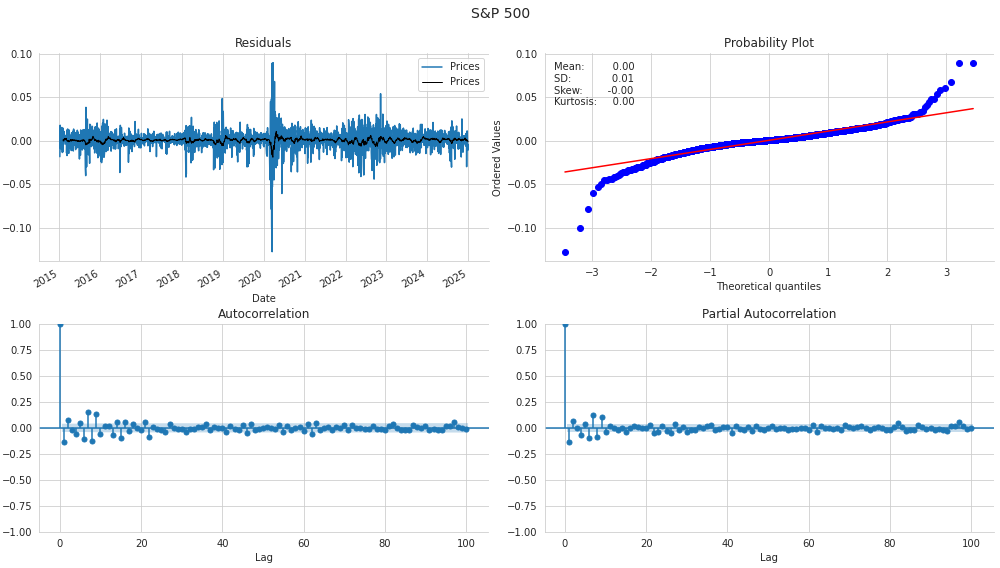

In [176]:
plot_correlogram(sp_close_log_diff, lags=100, title="S&P 500")

In [181]:
def plot_components(x, period, title=None):
    components = tsa.seasonal_decompose(x, model='additive', period=period)
    ts = (x
        .assign(Trend=components.trend)
        .assign(Seasonality=components.seasonal)
        .assign(Residual=components.resid))
    with sns.axes_style('white'):
        ts.plot(subplots=True, figsize=(14, 8), title=[title, 'Trend Component', 'Seasonal Component','Residuals'], legend=False)
        plt.suptitle('Seasonal Decomposition', fontsize=14)
        sns.despine()
        plt.tight_layout()
        plt.subplots_adjust(top=.91)

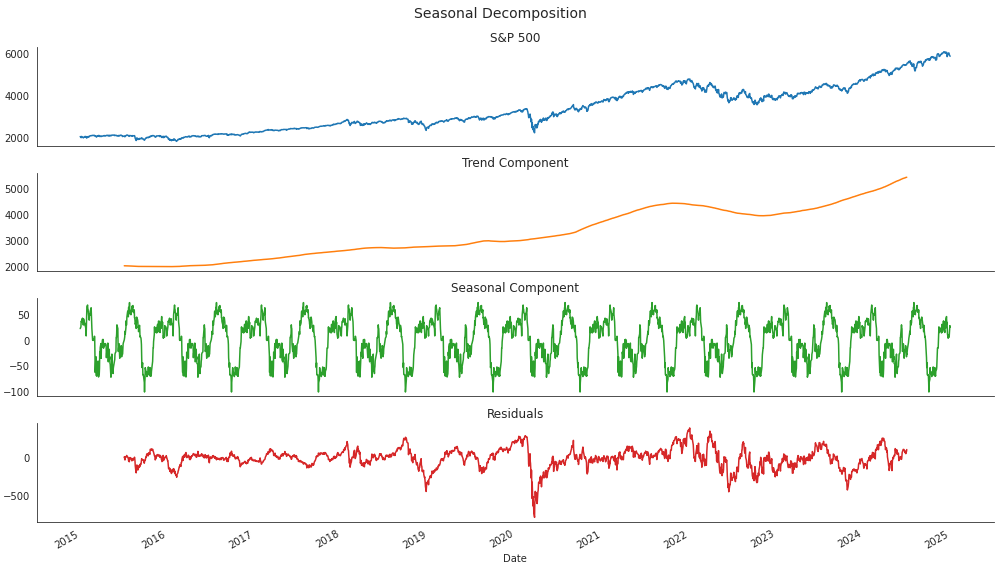

In [182]:
plot_components(sp_close, period=252, title="S&P 500")

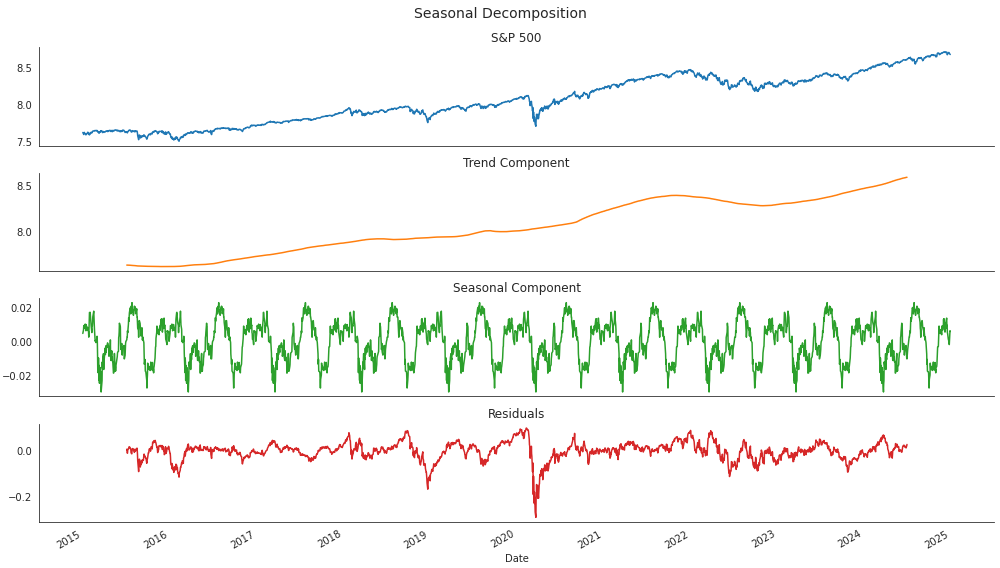

In [ ]:
plot_components(sp_close_log, period=252, title="Log S&P 500")

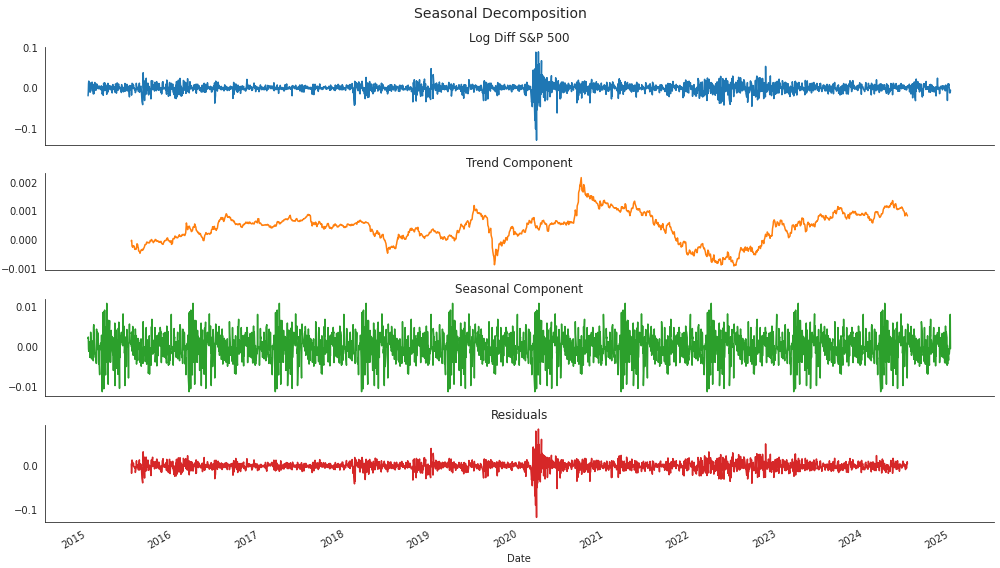

In [184]:
plot_components(sp_close_log_diff, period=252, title="Log Diff S&P 500")